In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

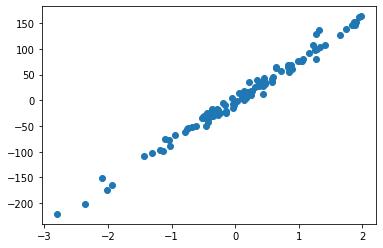

In [8]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter (x, y)

In [12]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [20]:
x1 = np.hstack((x, np.ones(x.shape)))
print(x1.shape)

(100, 2)


In [21]:
t = np.random.randn(2, 1)
print(t)

[[ 1.5209709 ]
 [-1.28079981]]


In [22]:
def curve1 (x1, t):
    return x1.dot(t)

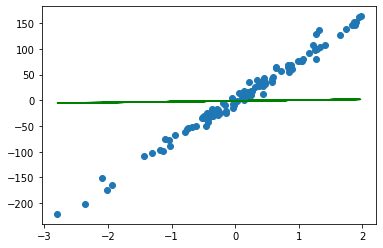

In [29]:
plt.scatter(x, y)
plt.plot(x, curve1(x1, t), c = 'g')